# Problem Set 4
## Nora Nickels
### Perspectives of Computational Research
### Spring 2018

## Problem 1: Discrete approximation of an AR(1) process

In [2]:
# Import packages and libraries

import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib.ticker import MultipleLocator
%matplotlib notebook

### (a) Simulate a time series and plot the first 100 observations

In [5]:
# Define initial assumptions
mu = 11.4
rho = 0.85
sigma = 0.7

# Simulate a time series of 500 periods
T = 500

# Drawing a vector of uniform random variables; draw uniform series that's T elements long
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [7]:
# Form z vector according to the continuous AR(1) process
z = np.zeros(T)
z[0] = rho * unif_vec[0] + (1 - rho) * mu + eps_vec[0]
for i in range(T):
    z[i] = rho * z[i - 1] + (1 - rho) * mu + eps_vec[i]

<IPython.core.display.Javascript object>


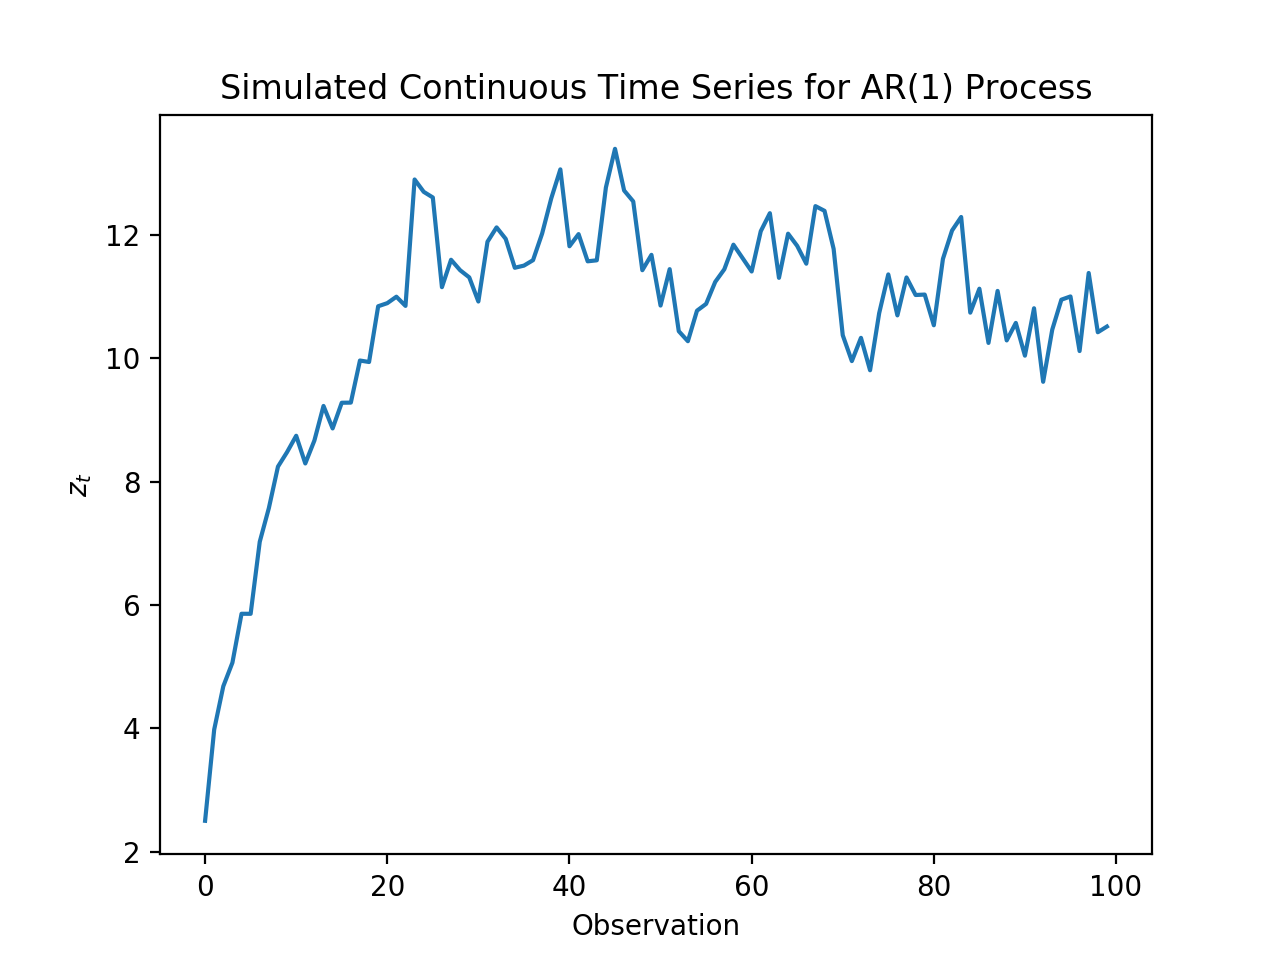

In [26]:
# Plot the first 100 observations of the resulting simulated time series

% matplotlib notebook

plt.plot(z[:100])
plt.title("Simulated Continuous Time Series for AR(1) Process", fontsize = 12)
plt.xlabel("Observation")
plt.ylabel("$z_t$")
plt.show()

### (b) Create a 5-element vector z-vals

In [9]:
# Define lower and upper limits for the points
lower = mu - 3 * sigma
upper = mu + 3 * sigma
# Evenly spaced points vector
z_vals = np.linspace(lower, upper, 5)
z_vals

array([  9.3 ,  10.35,  11.4 ,  12.45,  13.5 ])

### (c) Estimate the probabilities of a 5 x 5 Markov transition matrix

In [10]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([  9.825,  10.875,  11.925,  12.975])

In [12]:
# Define the bins

z_bins = np.empty(T)

for i in range(T):
    if z[i] <= z_cuts[0]:
        z_bins[i] = 0
    
    elif z[i] <= z_cuts[1]:
        z_bins[i] = 1
    
    elif z[i] <= z_cuts[2]:
        z_bins[i] = 2
        
    elif z[i] <= z_cuts[3]:
        z_bins[i] = 3
        
    else:
        z_bins[i] = 4

In [15]:
# Matrix of all the counts from simulated data
counts = np.full((5,5), 0)

for i in range(T):
    bin_now = int(z_bins[i])
    if i == 0:
        continue
    assert i >= 1
    
    bin_prev = int(z_bins[i-1])
    
    counts[bin_prev][bin_now] += 1

assert np.sum(counts) == T-1


# Estimate the transition matrix probabilities
Prob_matrix = counts / (counts.sum(axis=1).reshape(5,1) )
print(Prob_matrix)

[[ 0.75757576  0.21212121  0.03030303  0.          0.        ]
 [ 0.0990991   0.51351351  0.34234234  0.04504505  0.        ]
 [ 0.03164557  0.22151899  0.48101266  0.23417722  0.03164557]
 [ 0.          0.04273504  0.34188034  0.5042735   0.11111111]
 [ 0.          0.          0.04255319  0.34042553  0.61702128]]


/Users/noranickels/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((5, 5), 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


### (d) What is the probability of z(t+3) being in bin 5?

In [17]:
# Start with bin 3 as the current bin in current period
current_bin = np.array([[0],[0],[1],[0],[0]])

# Find probabilities after three periods from current period
x_row_u = np.dot(LA.matrix_power(Prob_matrix.T, 3), current_bin)
print(x_row_u)

[[ 0.08214181]
 [ 0.23173255]
 [ 0.3589505 ]
 [ 0.24940938]
 [ 0.07776575]]


The probability that z will be in bin 5 is 0.07776575.

### (e) What is the stationary distribution of z(t)?

In [18]:
# Eigenvalues and eigenvectors to eliminate iteration until reaching a stable point
eigvals, eigvecmat = LA.eig(Prob_matrix.T)
print(eigvals)
print(eigvecmat)

eigvec = eigvecmat[:, 1] / eigvecmat[:, 1].sum()
stat_dist = eigvec
print("The stationary distribution of z_t is:", stat_dist)

[ 0.10990221  1.          0.36346666  0.79413357  0.60589428]
[[-0.02182777  0.27514573  0.15403342  0.70600193  0.41306435]
 [ 0.39430816  0.46274509 -0.67181556  0.31720688 -0.43991454]
 [-0.78805078  0.65868221  0.18550288 -0.17775101 -0.60226686]
 [ 0.469196    0.48775834  0.63268089 -0.5000147   0.12060809]
 [-0.05362562  0.19593711 -0.30040163 -0.34544311  0.50850896]]
The stationary distribution of z_t is: [ 0.13226453  0.22244489  0.31663327  0.23446894  0.09418838]


### (f) Simulate a time series of T values of the discretized version of z(t) and plot versus the continuous version from part (a).

In [20]:
# Create a series of x's that start at initial value
# And move forward by the coin flip

z_0 = z_vals[2]
z_vec = np.zeros(T)
z_t = z_0
zt_ind = 1
for t_ind in range(T):
    # Calculate new index and new value
    # cummulative sum takes the correct row of the transition matrix 
    # and cummulative sums them
    ztp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(Prob_matrix[zt_ind, :])).min()
    z_tp1 = z_vals[ztp1_ind]
    z_vec[t_ind] = z_tp1
    # Update the current value and its index in the loop
    z_t = z_tp1
    zt_ind = ztp1_ind

<IPython.core.display.Javascript object>


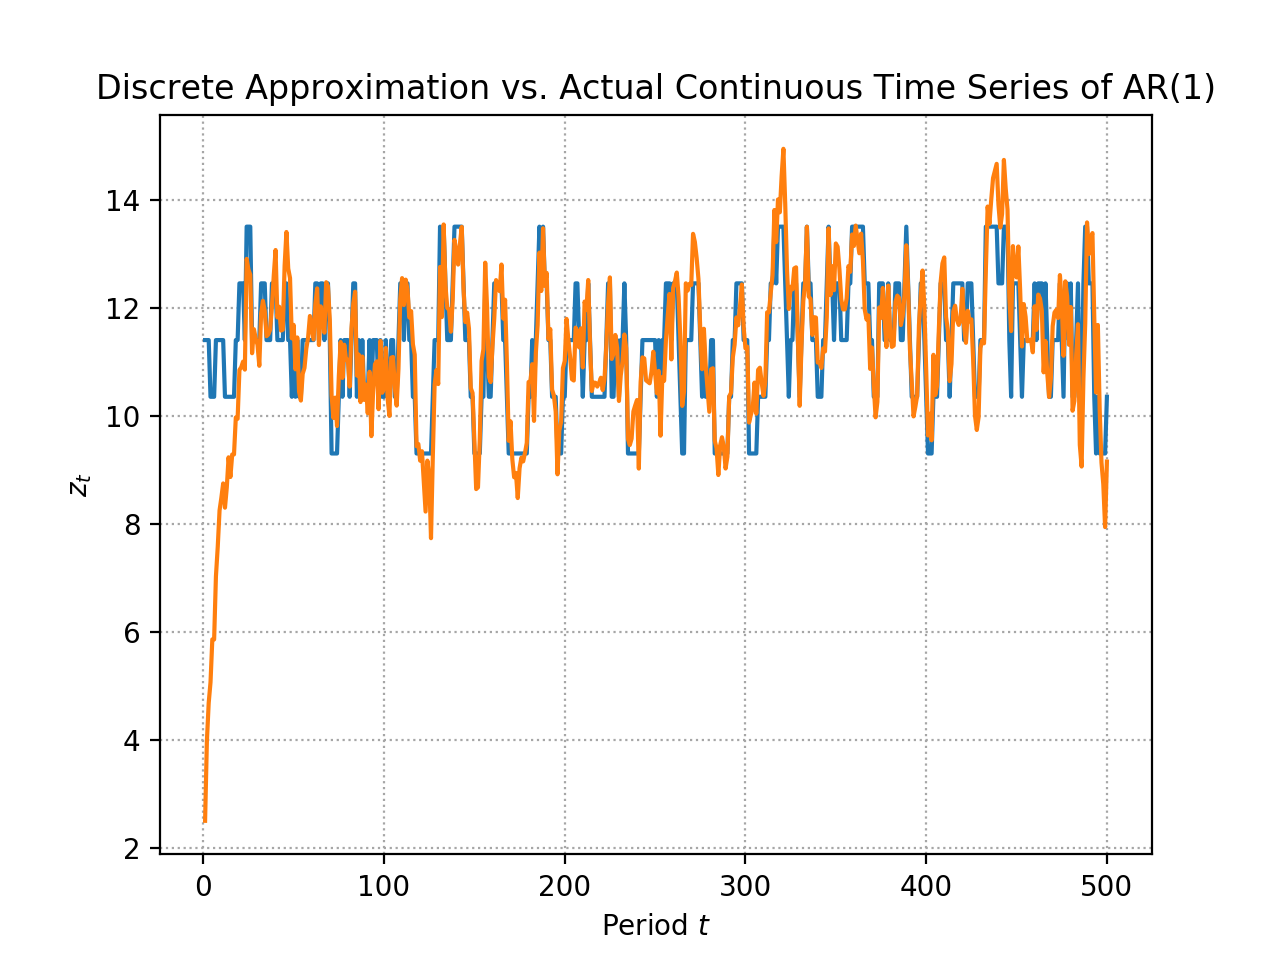

Text(0,0.5,'$z_t$')

In [25]:
# Plot the discretized version values vs. continuous version

% matplotlib notebook

plt.plot(np.arange(1, T + 1), z_vec)
plt.plot(np.arange(1, T + 1), z)
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'Discrete Approximation vs. Actual Continuous Time Series of AR(1)', fontsize=12)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$z_t$')